# Credit Card Fraud Detection<br>
### Project Goals
- Discover drivers of fraud from credit card data
- Use these drivers to develop a machine learning model that helps predicts fraud
- This information could be used on future datasets to help detect fraud

In [1]:
# data science imports
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
# ML imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
# no warnings 
import warnings
warnings.filterwarnings("ignore")
# premade functions
import wrangle as w
import explore as e
import model as m

# Acquire<br>
- Data aquired from Kaggle  
- Data frame containted 1,000,000 rows and 8 columns before cleaning  
- Each row represents a credit card transaction  
- Each column represents a feature associated with the transaction  

In [2]:
# Use wrangle function to import raw data
df = w.wrangle_cc()
# take a peak
df.head(3)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0


# Prepare<br>
- Data came pythonic and not much was needed in terms of readability
- I checked for nulls and none were present
- I checked for outliers and though there were some, I chose to keep as they were needed

# Data Dictionary
This will help with any questions or information on this dataset

| Name                 | Definition |
| -------------------- | ---------- |
| distance_from_home | The distance from home where the transaction happened |
| distance_from_last_transaction | The distance from last transaction |
| ratio_to_median_purchase_price | Ratio of purchased price transaction to median purchase price. |
| repeat_retailer      | Binary, specifies if the transaction happened from same retailer. |
| used_chip           | Binary, specifies if the transaction through chip (credit card). |
| used_pin_number  | Binary, specifies if the transaction happened by using PIN number. |
| online_order | Binary, specifies if the transaction is an online order. |
| fraud              | Binary, specifies if the transaction is fraudulent. |


# Split data into train/validate/test sample dataframes

In [3]:
# function to split data and print shape of our splits
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = w.split_data(df, 
                                                                                              'fraud')

train -> (560000, 8)
validate -> (240000, 8)
test -> (200000, 8)


# Exploration<br>
- Here we will be asking some questions of our data
- We will then support these questions with visuals and statistical tests

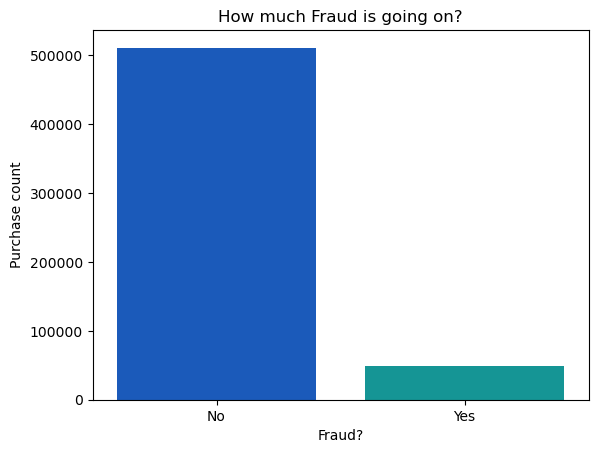

In [4]:
# function for big questions
e.big_question(train)

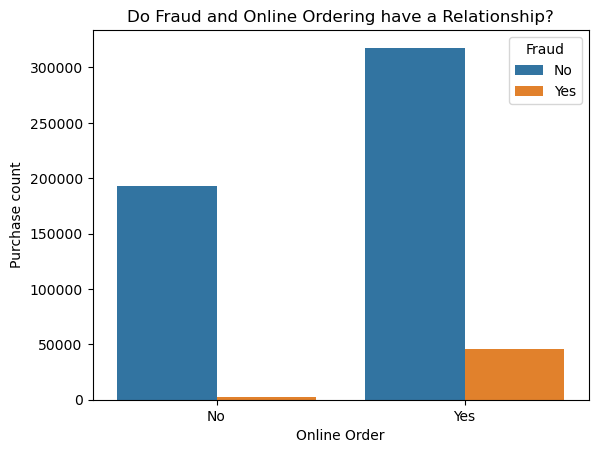

In [5]:
# function for visual 1
e.question_1_visual(train)

In [6]:
# function for stats test on question 1
e.question_hypothesis_test(1,train,'online_order',
                            'Do Fraud and Online Ordering have a Relationship?',
                            'fraud',alpha=.05)

# Question #1:

# Do Fraud and Online Ordering have a Relationship?

### Hypothesis:

$H_0$: There is no relationship between `online_order` to `fraud`

$H_A$: There is a relationship between `online_order` and `fraud` 

### Statistics Test:

### `Chi-Square = 20505.323211877636`

### Results:

### Reject $H_0$

There exists some relationship between online_order and fraud. (p-value: 0.0000)

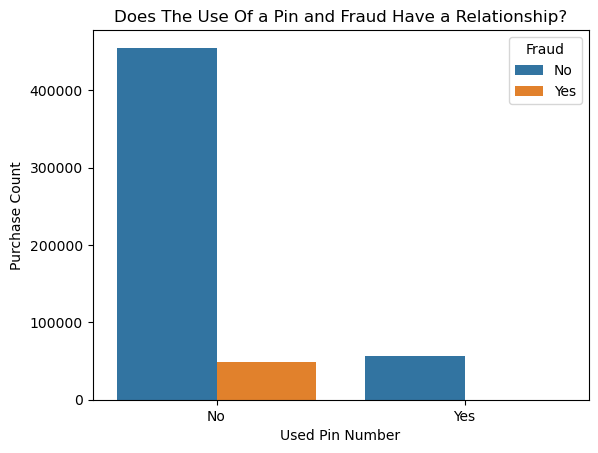

In [7]:
# function for visual 2
e.question_2_visual(train)

In [8]:
# function for stats test on question 2
e.question_hypothesis_test(2,train,'used_pin_number',
                            'Does The Use Of a Pin and Fraud Have a Relationship?',
                            'fraud',alpha=.05)

# Question #2:

# Does The Use Of a Pin and Fraud Have a Relationship?

### Hypothesis:

$H_0$: There is no relationship between `used_pin_number` to `fraud`

$H_A$: There is a relationship between `used_pin_number` and `fraud` 

### Statistics Test:

### `Chi-Square = 5592.074653318332`

### Results:

### Reject $H_0$

There exists some relationship between used_pin_number and fraud. (p-value: 0.0000)

In [9]:
# function for visual 3
#e.question_3_visual(train)

In [4]:
# function for stats test on questions 3
e.question_hypothesis_test3(train)

We reject the null hypothesis, there is correlation
correlation: 0.46196634555217075
p:           0.0


In [11]:
# function for visual 4
e.question_4_visual(train)

In [5]:
# function for stats test on question 4
e.question_hypothesis_test4(train)

We reject the null hypothesis, there is correlation
correlation: 0.18788108422191152
p:           0.0


# Exploration Summary<br>
- ratio_to_median_purchase_price had some correlation
- distance_from_home also had some correlatio, but no enough to move forward
- used_pin_number proved to have significance with fraud
- online_ordering also proved to have significance with fraud<br>

#### We are moving forward to include these drivers in our model:
- ratio_to_median_purchase_price
- used_pin_number
- online_ordering

# Modeling<br>
We ran the algorithms below to see what fit the data best.

## Making the Baseline

In [13]:
# function to generate baseline
m.get_baseline(df)

### Baseline: 91.26%

## Random Forest

In [14]:
# function to get random forest algorithm
m.get_rf(X_train, y_train, X_validate, y_validate)

Random Forest Model
Accuracy of Random Forest on train data: 99.95%
Accuracy of Random Forest on validate: 99.95%


## Logistic Regression

In [15]:
# function to get logistic regression algorithm
m.get_logit(X_train, y_train, X_validate, y_validate)

Logistic Regression Model
Accuracy of Logistic Regression on train: 95.73%
Accuracy of Logistic Regression on validate: 95.69%


## K Nearest Neighboor

In [16]:
# function to get knn algorithm
m.get_knn(X_train, y_train, X_validate, y_validate)

KNN Model
Accuracy of KNN on train: 99.38%
Accuracy of KNN on validate: 98.31%


## Descision Tree

In [17]:
# function to get knn algorithm
m.get_clf(X_train, y_train, X_validate, y_validate)

Decision Tree Model
Accuracy of Decision Tree on train: 99.88%
Accuracy of Decision Tree on validate: 99.87%


# Visualize All Models

<Figure size 1100x850 with 0 Axes>

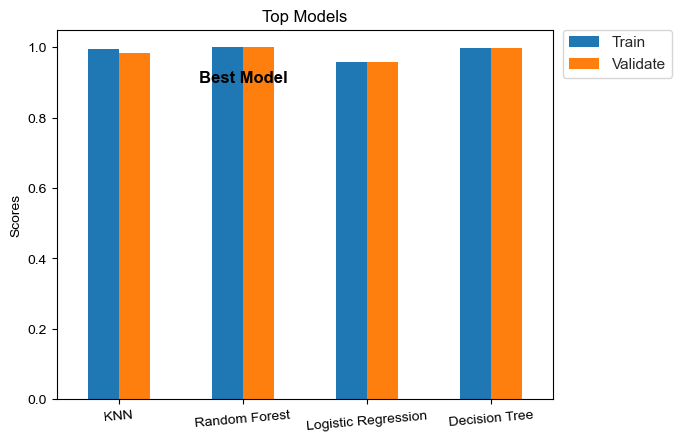

In [18]:
#function for visual of top models
m.get_top_models(X_train, y_train, X_validate, y_validate)

<div class="alert alert-success" role="alert">
    <B>TAKEAWAY:</B> We are going with the Random Forest model for test, as it achieved the highest Accuracy on of <b>99.95%</b> and <b>99.95%</b> on Train and Validate, respectively. 
</div>

# Test Model<br>
- We are choosing the Random Forest model as it has the highest accuracy.
- We will now run our model on the test data to gauge how it will perform on unseen data.

In [19]:
# function to get test 
m.get_test(X_train, y_train, X_test, y_test)

### Random Forest Model

### Accuracy on Test 99.94%

# Test Versus Baseline Visual

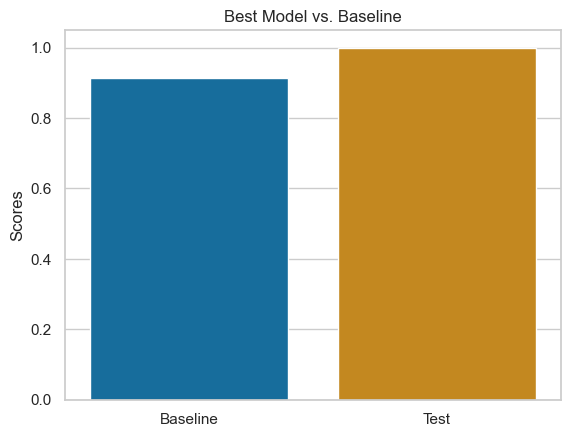

In [20]:
# functions to get visual on test vs baseline
m.get_mvb(X_train, y_train, X_test, y_test, df)

## Modeling Wrap
The Random Forest model outperforms the baseline and I would recommend to use this model, as it beat it by almost 9%

# Conclusion<br>
### Summary
- ratio_to_median_purchase_price had some correlation
- distance_from_home also had some correlatio, but no enough to move forward
- used_pin_number proved to have significance with fraud
- online_ordering also proved to have significance with fraud

# Recommendations<br>
- Adding a feature for mean purchases in a day can help with modeling
- Adding a feature for distance from work could also help as we spend most time at our homes and jobs
- Purchase amounts can be helpful as well

# Next Steps<br>
- If provided more time to work on this project I would try and use scaling with my modeling and I would also try and bin the distance and ratio to median purchase price to use for modeling.